In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline


# Upload and check dataset

In [65]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [66]:
df.info 

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20      

In [67]:
df.describe 

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20    

# Prepare data 

In [6]:
#Handling missing values- how many missing values? 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Product 2 & 3 have missing values. I will choose to assign zero for NA vlues 

In [68]:
#Missing values will be dropped to prevent NA categories in the visualization portion or prevent any false conclusions 

df.fillna(value=0,inplace=True)


In [53]:
#check age column if it is numerical
age = np.unique(df['Age'])
age


array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [12]:
#Transfer categorical column into numeric to make it easier to manipulate this column
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

# Analyze data 

# Question 1: What is the age and gender distribution?

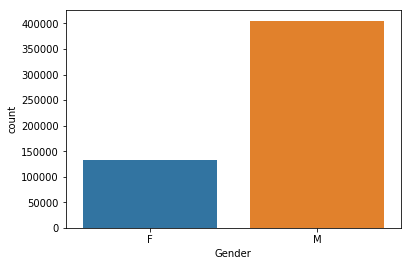

In [9]:
sns.countplot(df['Gender'])

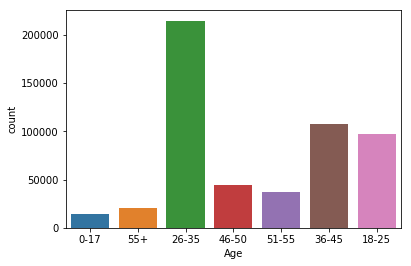

In [10]:
sns.countplot(df['Age'])

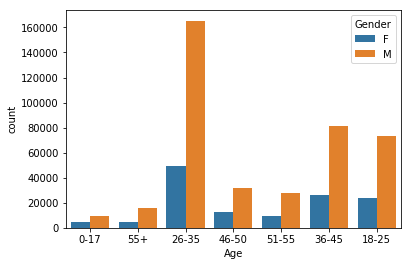

In [11]:
# A better visual combining both features 
sns.countplot(df['Age'],hue=df['Gender'])

# Question 2: What is the purchase amount across age

/Users/erikportillo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


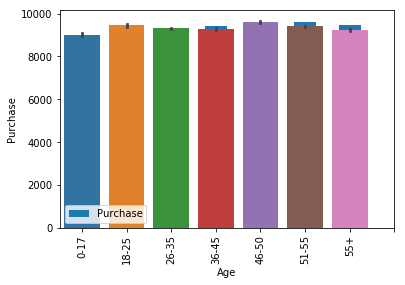

In [55]:
#For age and purchase, use groupby on age with mean method to see the average amouont each age group has spent
df[['Age','Purchase']].groupby('Age').mean().plot.bar()
# plot 
sns.barplot('Age', 'Purchase', data = df)

#Since the age groups have been transformed to numberic values- need to relabel x-axis by age grooup
# will be done through xticks where I can manually rename the numbers to the age group it represents
positions = (0, 1, 2, 3, 4 , 5, 6, 7 )
labels = ("0-17", "18-25", "26-35", "36-45", "46-50","51-55","55+")
plt.xticks(positions, labels)
plt.show()



## Question 3: Is there a correlation between the product type, age, occupation, marital status and purchase?

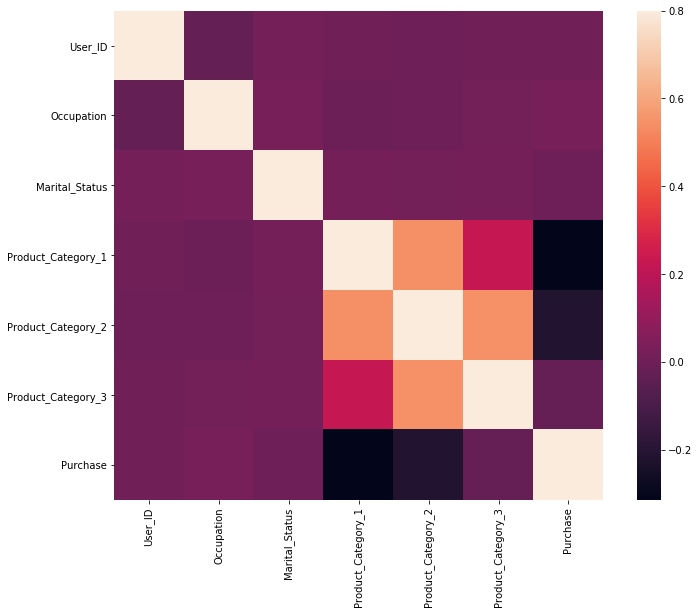

In [56]:
# correlation represented as a heat map
corrmat = df.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [63]:
#mean price of the products
mean_cat_1 = df['Product_Category_1'].mean()
mean_cat_2 = df['Product_Category_2'].mean()
mean_cat_3= df['Product_Category_3'].mean()

print(" Product_1: {} \n Product_2: {} \n Product_3: {}"
      .format(mean_cat_1, mean_cat_2, mean_cat_3))

 Product_1: 5.295546498455105 
 Product_2: 9.842144034798471 
 Product_3: 12.669840149015693
